In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats

In [2]:
data = pd.read_excel('E-commerce data.xlsx')

In [3]:
data

,itemid,shopid,item_name,item_description,item_variation,price,stock,category,cb_option,is_preferred,sold_count,item_creation_date
0,1925574,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355333 selling...,{},400.00,1,Mobile & Gadgets,0,0,0,2015-10-01 00:24:42
1,1925617,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355888 selling...,{},400.00,1,Mobile & Gadgets,0,0,0,2015-10-01 00:26:37
2,943600,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.00,1,Mobile & Gadgets,0,0,0,2015-08-25 21:02:13
3,1064405,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.00,1,Mobile & Gadgets,0,0,0,2015-08-30 20:16:07
4,20046620,760000,101% AUTHENTIC BASEBALL CAPS,"PREORDER Takes about 23 weeks to arrive, will ...","{NEWERA BLACK: 35.0, NIKE SWOOSH DENIM: 35.0, ...",35.00,300,Women's Apparel,0,0,0,2016-05-09 01:14:34
5,20047128,760000,101% AUTHENTIC BASEBALL CAPS,"PREORDER Takes about 23 weeks to arrive, will ...","{NIKE SWOOSH DENIM: 35.0, NIKE SWOOSH BLACK: 3...",35.00,299,Men's Wear,0,0,1,2016-05-09 01:18:21
6,78419076,11272000,Hada Labo Super Hydrating Perfect Gel Moisturi...,Hada Labo Super Hydrating Perfect Gel Moisturi...,"{Hydratg UV: 28.72, Super Hydg: 28.72, Whiteni...",28.72,8,Health & Beauty,0,1,5,2016-10-20 11:17:41
7,252736983,11272000,Hada Labo Super Hydrating Perfect Gel Moisturi...,Hada Labo is a skin care line researched & dev...,{},28.72,8,Health & Beauty,0,1,1,2017-05-09 18:33:30
8,793229430,49082000,Women Lace Bra Bustier Crop Tops Soft Mesh Tri...,Material: Terylene Colors: BalckStyle: Sexy Br...,"{S: 9.98, M: 9.98, L: 9.98, XL: 9.98}",9.98,400,Women's Apparel,1,0,0,2017-12-28 19:55:45
9,809446063,49082000,Women Lace Bra Bustier Crop Tops Soft Mesh Tri...,Material: Terylene Colors: BalckStyle: Sexy Br...,"{S: 9.98, M: 9.98, L: 9.98}",9.98,300,Women's Apparel,1,0,0,2018-01-05 16:08:24


In [4]:
# change the column names
data.rename(index=str, columns={'itemid': 'item_id',
                              'shopid' : 'shop_id',
                              'item_name' : 'item_name',
                              'item_description' : 'item_description',
                              'item_variation' : 'item_variation',
                              'price' : 'price',
                              'stock' : 'stock',
                              'category' : 'category',
                              'cb_option' : 'cb_option',
                              'is_preferred' : 'is_preferred',
                              'sold_count' : 'sold_count',
                              'item_creation_date' : 'item_creation_date'}, inplace=True)
data

,item_id,shop_id,item_name,item_description,item_variation,price,stock,category,cb_option,is_preferred,sold_count,item_creation_date
0,1925574,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355333 selling...,{},400.00,1,Mobile & Gadgets,0,0,0,2015-10-01 00:24:42
1,1925617,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355888 selling...,{},400.00,1,Mobile & Gadgets,0,0,0,2015-10-01 00:26:37
2,943600,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.00,1,Mobile & Gadgets,0,0,0,2015-08-25 21:02:13
3,1064405,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.00,1,Mobile & Gadgets,0,0,0,2015-08-30 20:16:07
4,20046620,760000,101% AUTHENTIC BASEBALL CAPS,"PREORDER Takes about 23 weeks to arrive, will ...","{NEWERA BLACK: 35.0, NIKE SWOOSH DENIM: 35.0, ...",35.00,300,Women's Apparel,0,0,0,2016-05-09 01:14:34
5,20047128,760000,101% AUTHENTIC BASEBALL CAPS,"PREORDER Takes about 23 weeks to arrive, will ...","{NIKE SWOOSH DENIM: 35.0, NIKE SWOOSH BLACK: 3...",35.00,299,Men's Wear,0,0,1,2016-05-09 01:18:21
6,78419076,11272000,Hada Labo Super Hydrating Perfect Gel Moisturi...,Hada Labo Super Hydrating Perfect Gel Moisturi...,"{Hydratg UV: 28.72, Super Hydg: 28.72, Whiteni...",28.72,8,Health & Beauty,0,1,5,2016-10-20 11:17:41
7,252736983,11272000,Hada Labo Super Hydrating Perfect Gel Moisturi...,Hada Labo is a skin care line researched & dev...,{},28.72,8,Health & Beauty,0,1,1,2017-05-09 18:33:30
8,793229430,49082000,Women Lace Bra Bustier Crop Tops Soft Mesh Tri...,Material: Terylene Colors: BalckStyle: Sexy Br...,"{S: 9.98, M: 9.98, L: 9.98, XL: 9.98}",9.98,400,Women's Apparel,1,0,0,2017-12-28 19:55:45
9,809446063,49082000,Women Lace Bra Bustier Crop Tops Soft Mesh Tri...,Material: Terylene Colors: BalckStyle: Sexy Br...,"{S: 9.98, M: 9.98, L: 9.98}",9.98,300,Women's Apparel,1,0,0,2018-01-05 16:08:24


In [5]:
# total number of rows
len(data)

464433

In [6]:
# total number of rows w/o duplicates
data.drop_duplicates(keep=False,inplace=True) 
len(data)
# no duplicates

464433

In [7]:
# number of unique items sold
item_unique = data["item_name"].nunique()
# number of unique shops
shop_unique = data["shop_id"].nunique()
# number of unique categories 
category_unique = data["category"].nunique()

item_unique,shop_unique,category_unique
print(f"number of unique items sold: \n{item_unique}\n")
print(f"number of unique shops: \n{shop_unique}\n")
print(f"number of unique categories: \n{category_unique}")

number of unique items sold: 
118345

number of unique shops: 
7856

number of unique categories: 
20


There are 20 unique categories in the database. The TOP 10 categories are:
category
Women's Apparel            86914
Mobile & Gadgets           61736
Jewellery & Accessories    54427
Men's Wear                 53475
Toys, Kids & Babies        30184
Home & Living              29757
Health & Beauty            27469
Bags & Luggage             27399
Men's Shoes                24259
Women's Shoes              19509
Name: item_id, dtype: int64

TOP 10 categories covers 89.4 percent of all the orders.


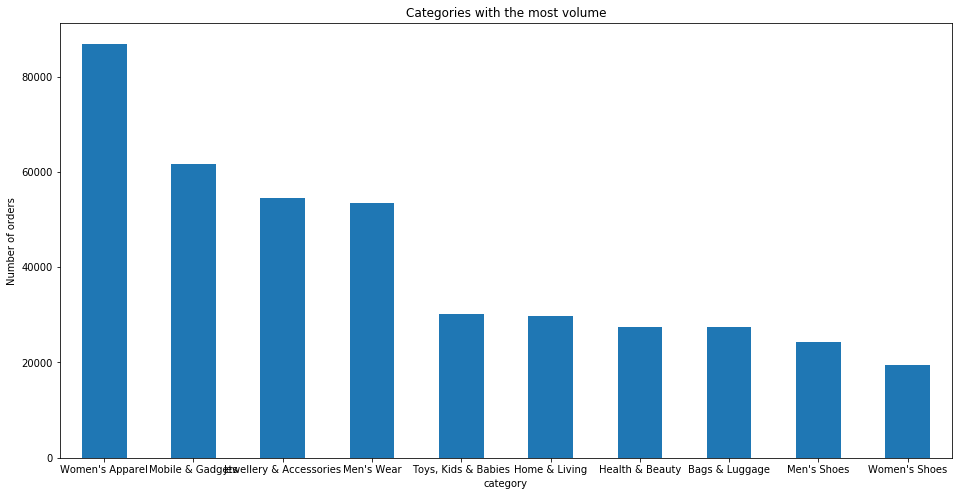

In [26]:
print("There are",category_unique,"unique categories in the database. The TOP 10 categories are:")
a1 = data.groupby('category')['item_id'].nunique().sort_values(ascending=False).head(10)
print(a1)
print("\nTOP 10 categories covers", round(a1.sum()/data.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
a1.plot(kind="bar",rot=0)
plt.title("Categories with the most volume")
plt.ylabel('Number of orders')
plt.show()

There are 7856 unique shops in the database. The TOP 10 shops with the most number of listed items are:
shop_id
32351807    12963
49095917     8376
47695236     7997
51117796     7193
11010806     7135
47695125     7128
51117755     6644
36480202     5987
10377818     5847
59322156     4849
Name: item_id, dtype: int64

TOP 10 shops covers 16.0 percent of all the listed items.


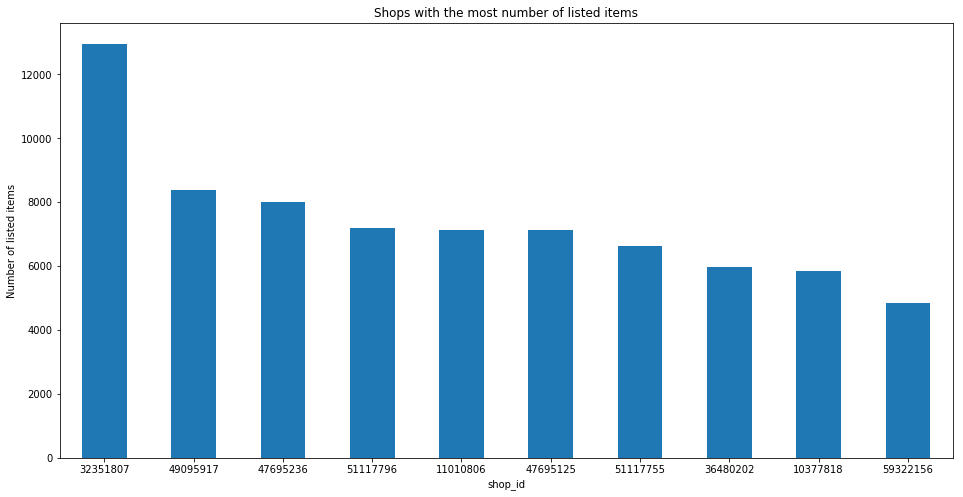

In [25]:
print("There are",shop_unique,"unique shops in the database. The TOP 10 shops with the most number of listed items are:")
a2 = data.groupby('shop_id')['item_id'].nunique().sort_values(ascending=False).head(10)
print(a2)
print("\nTOP 10 shops covers", round(a2.sum()/data.shape[0]*100,1),"percent of all the listed items.")
plt.figure(figsize=(16,8))
a2.plot(kind="bar",rot=0)
plt.title("Shops with the most number of listed items")
plt.ylabel('Number of listed items')
plt.show()

In [10]:
cb_pref = []
for i in range (len(data)):
    if data.cb_option[i] == 1 and data.is_preferred[i] == 1:
        cb_pref.append(data.shop_id[i])
final_cb_pref = (list(set(cb_pref)))
len(final_cb_pref)

158

In [36]:
zerosoldcount = 0
for i in range(len(data)):
    if data.sold_count[i] == 0:
        zerosoldcount +=1 
zerosoldcount

438092

In [37]:
print("There are " + str(len(final_cb_pref)) + " unique preferred and cross border shops are in the dataset")
print("There are " + str(zerosoldcount) + " products with zero sold count")

There are 158 unique preferred and cross border shops are in the dataset
There are 438092 products with zero sold count


In [38]:
oneeightproducts = 0
onesevenproducts = 0
onesixproducts = 0
onefiveproducts = 0
for i in range(len(data)):
    if data.item_creation_date[i].year == 2018:
        oneeightproducts += 1
    elif data.item_creation_date[i].year == 2017:
        onesevenproducts += 1
    elif data.item_creation_date[i].year == 2016:
        onesixproducts += 1
    else:
        onefiveproducts += 1

In [40]:
print("There were " + str(oneeightproducts) + " products were created in the year 2018.")
print("There were " + str(onesevenproducts) + " products were created in the year 2017.")
print("There were " + str(onesixproducts) + " products were created in the year 2016.")
print("There were " + str(onefiveproducts) + " products were created in the year 2015.")

There were 177407 products were created in the year 2018.
There were 202459 products were created in the year 2017.
There were 75857 products were created in the year 2016.
There were 8710 products were created in the year 2015.


In [11]:
# helper function that helps to calculate selling conversion
def revenue(df):
    return df['sold_count']*df['price']

In [12]:
data.apply(lambda row: revenue(row), axis=1)

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
5          35.00
6         143.60
7          28.72
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13          0.00
14          0.00
15          0.00
16          0.00
17          0.00
18          0.00
19          0.00
20          0.00
21          0.00
22          0.00
23          0.00
24          0.00
25          0.00
26          0.00
27          0.00
28          0.00
29          0.00
           ...  
464403      0.00
464404      0.00
464405      0.00
464406      0.00
464407      0.00
464408      0.00
464409      0.00
464410      0.00
464411      0.00
464412      0.00
464413      0.00
464414      0.00
464415      0.00
464416      5.00
464417      0.00
464418      0.00
464419      0.00
464420      0.00
464421      0.00
464422      4.00
464423      0.00
464424      0.00
464425      0.00
464426      0.00
464427      0.00
464428      0.00
464429      0.00
464430      0.

In [14]:
data['revenue'] = data.apply(lambda row: revenue(row), axis=1)

The TOP 10 shops with the most revenue are:
shop_id
18796234    177897.79
30769353     63491.39
30628794     39852.00
53274352     37694.00
195531       28961.00
13132381     27051.80
599533       22722.00
406582       21812.70
6072241      20187.62
21108609     19970.30
Name: revenue, dtype: float64

TOP 10 shops covers 27.7 percent of the total combined revenue of the dataset.


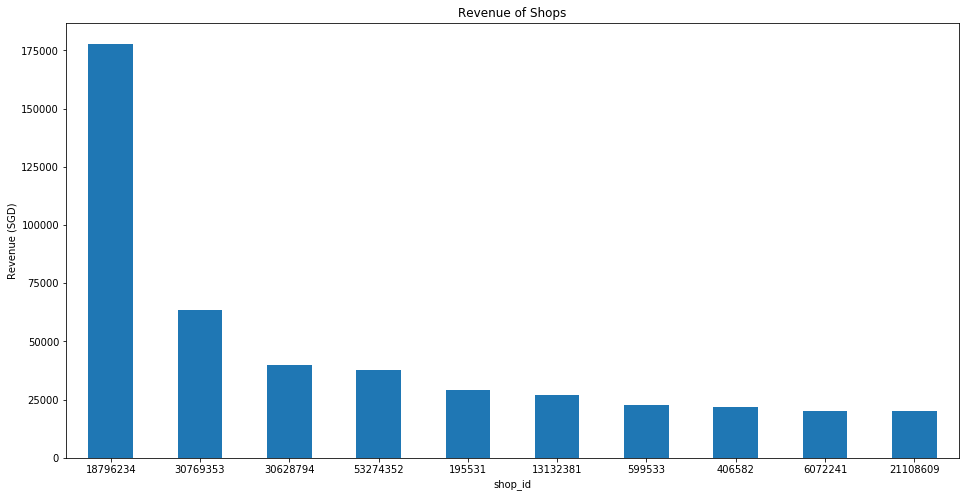

In [30]:
print("The TOP 10 shops with the most revenue are:")
a3 = data.groupby('shop_id')['revenue'].sum().sort_values(ascending=False).head(10)
print(a3)
print("\nTOP 10 shops covers", round(a3.sum()/data['revenue'].sum()*100,1),"percent of the total combined revenue of the dataset.")
plt.figure(figsize=(16,8))
a3.plot(kind="bar",rot=0)
plt.title("Revenue of Shops")
plt.ylabel('Revenue (SGD)')
plt.show()

The TOP 10 categories with the most revenue are:
category
Toys, Kids & Babies    353582.17
Women's Apparel        189640.39
Health & Beauty        180191.71
Games & Hobbies        151689.50
Mobile & Gadgets       137374.36
Home & Living          109989.77
Bags & Luggage          84609.02
Tickets & Vouchers      75530.30
Men's Wear              70744.86
Food & Beverages        54500.72
Name: revenue, dtype: float64

TOP 10 categories covers 84.8 percent of the total combined revenue of the dataset.


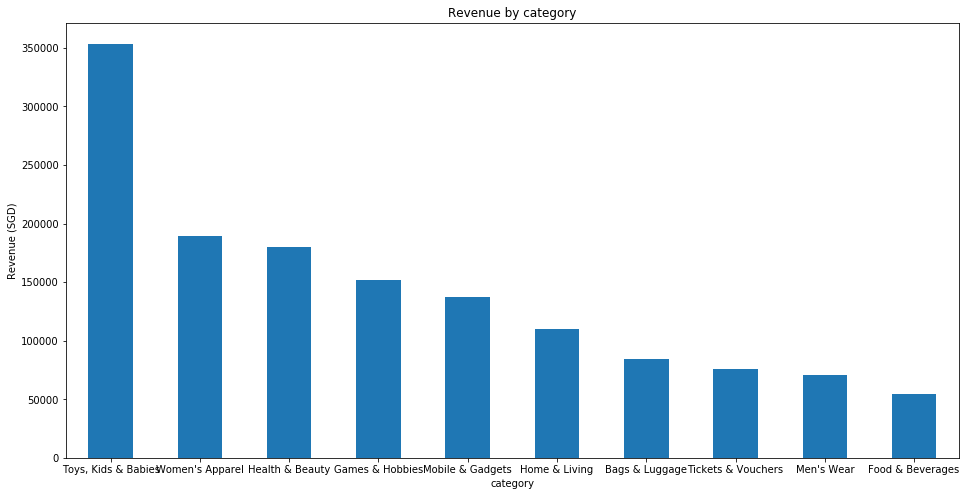

In [37]:
print("The TOP 10 categories with the most revenue are:")
a4 = data.groupby('category')['revenue'].sum().sort_values(ascending=False).head(10)
print(a4)
print("\nTOP 10 categories covers", round(a4.sum()/data['revenue'].sum()*100,1),"percent of the total combined revenue of the dataset.")
plt.figure(figsize=(16,8))
a4.plot(kind="bar",rot=0)
plt.title("Revenue by category")
plt.ylabel('Revenue (SGD)')
plt.show()
# data.groupby('category')['revenue'].sum()

In [44]:
type(data.item_variation[2])

str

In [54]:
# helper function that helps to calculate length of description
def lendesc(df):
    return len(str(df['item_description']))
# helper function that helps to calculate length of item variation
def lenvar(df):
    return len(str(df['item_variation']))

In [57]:
data['length_description']=data.apply(lambda row: lendesc(row), axis=1)
data['length_variation']=data.apply(lambda row: lenvar(row), axis=1)

In [64]:
data = data[data["price"] < 10000]

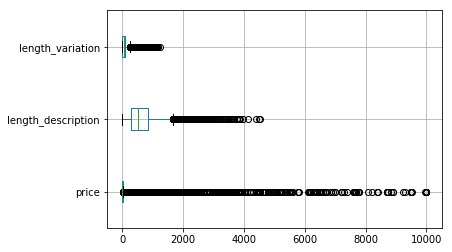

In [65]:
data[['price','length_description','length_variation']].plot.box(vert = False, grid = True)

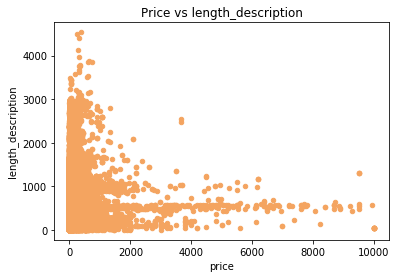

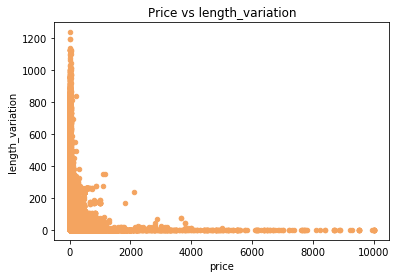

In [67]:
data.plot.scatter(x = 'price', y = 'length_description',
                  color = 'sandybrown', title = 'Price vs length_description')
data.plot.scatter(x = 'price', y = 'length_variation',
                  color = 'sandybrown', title = 'Price vs length_variation')
# Interestingly, Long product descriptions are associated with products at lower price points


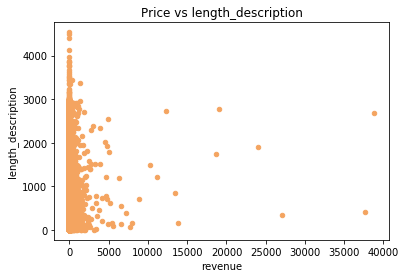

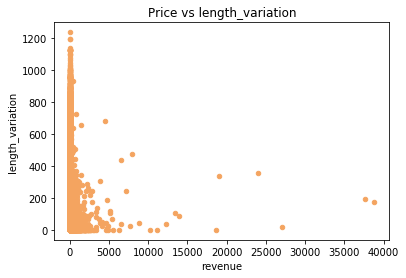

In [70]:
data.plot.scatter(x = 'revenue', y = 'length_description',
                  color = 'sandybrown', title = 'Revenue vs length_description')
data.plot.scatter(x = 'revenue', y = 'length_variation',
                  color = 'sandybrown', title = 'Revenue vs length_variation')
# the relationship between revenue per product and length of decription and variability is not so clear


The TOP 10 products with the most revenue are:
item_name
*INSTOCK* IRVINS Salted Egg Chips/Fish Skin/Tapioca                          39852.0
ntuc fairprice voucher                                                       37694.0
Xiaomi Mi Max 2 128GB 6 MTH warranty!                                        27051.8
[Promo] Darts Consumables Shafts/Flights/Tips                                25531.0
Leeogel Lego Minifigures Series 4 6 7 9 11 13 14 15 16 Disney Random Pack    19550.0
Dyson AM07 Bladeless Tower Fan (White Silver)                                18695.6
SKII Facial Treatment Essence 230ml                                          18170.9
Adventure Cove Waterpark                                                     14584.0
Lego Weekly Sales                                                            14520.0
20000mah slim powerbank                                                      14157.0
Name: revenue, dtype: float64

TOP 10 products covers 15.5 percent of the total combined reve

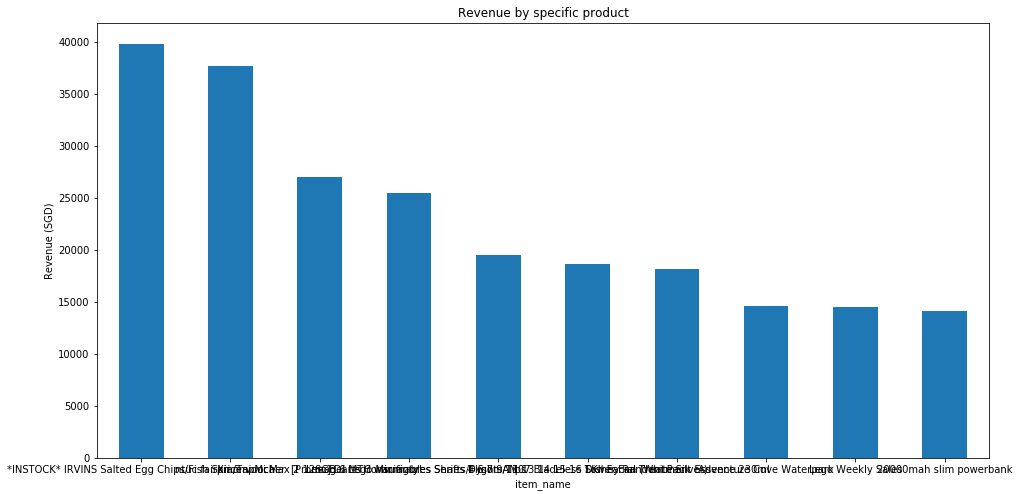

In [71]:
print("The TOP 10 products with the most revenue are:")
a5 = data.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(10)
print(a5)
print("\nTOP 10 products covers", round(a5.sum()/data['revenue'].sum()*100,1),"percent of the total combined revenue of the dataset.")
plt.figure(figsize=(16,8))
a5.plot(kind="bar",rot=0)
plt.title("Revenue by specific product")
plt.ylabel('Revenue (SGD)')
plt.show()

The TOP 10 products with the most sold volume are:
item_name
[Promo] Darts Consumables Shafts/Flights/Tips                                8158
*INSTOCK* IRVINS Salted Egg Chips/Fish Skin/Tapioca                          4443
Kailijumei Magic Color Moisturizer Lipstick Lips Care                        3027
180 Degree 3 in1 Clip On Fish Eye Wide Angle Macro Lens for Smartphone       2595
Bath & Body Works Pocketbac Hand Sanitizer                                   2341
Kellys Luncheon Ham                                                          2302
WK M&S 2 in 1 Lightning Micro Usb Double Data Cable                          1457
20000mah slim powerbank                                                      1430
Authentic Tupperware★ Aquasafe Eco 500ml Water Bottle*BPA Free* Best Gift     978
Adventure Cove Waterpark                                                      883
Name: sold_count, dtype: int64

TOP 10 products covers 17.6 percent of the total number of sold products.


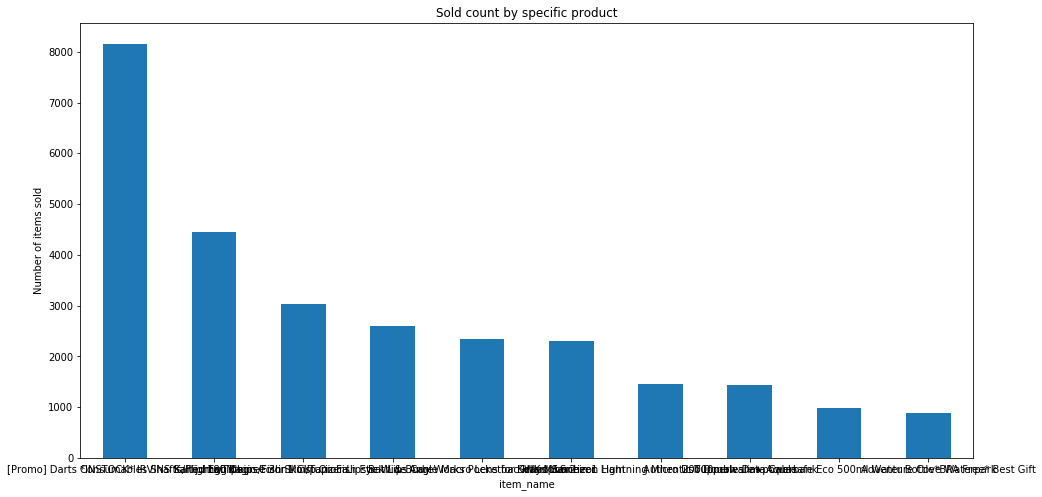

In [85]:
print("The TOP 10 products with the most sold volume are:")
a6 = data.groupby('item_name')['sold_count'].sum().sort_values(ascending=False).head(10)
print(a6)
print("\nTOP 10 products covers", round(a6.sum()/data.sold_count.sum()*100,1),"percent of the total number of sold products.")
plt.figure(figsize=(16,8))
a6.plot(kind="bar",rot=0)
plt.title("Sold count by specific product")
plt.ylabel('Number of items sold')
plt.show()

In [98]:
data.groupby('item_creation_date')['sold_count'].sum().sort_values(ascending=False).head(10)

item_creation_date
2016-08-17 23:11:56    8007
2017-08-13 12:32:27    4308
2016-04-19 15:49:34    2523
2015-09-29 12:13:43    2270
2016-07-15 09:05:39    1961
2017-02-06 11:00:36    1477
2017-03-11 00:29:23    1403
2016-07-29 20:53:42    1377
2016-11-12 09:34:05    1066
2016-12-07 13:33:45     929
Name: sold_count, dtype: int64